# IMPORTAR LIBRERIAS Y DATASET

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [37]:
df.head(50)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


# VISUALIZAR EL DATASET

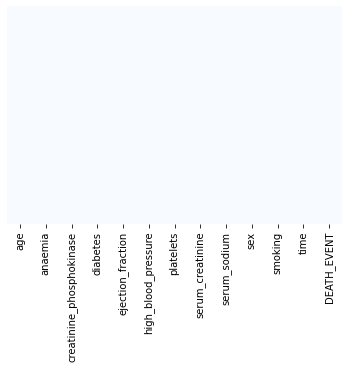

In [38]:
# Veo si faltan datos
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ba229c810>,
      dtype=object)

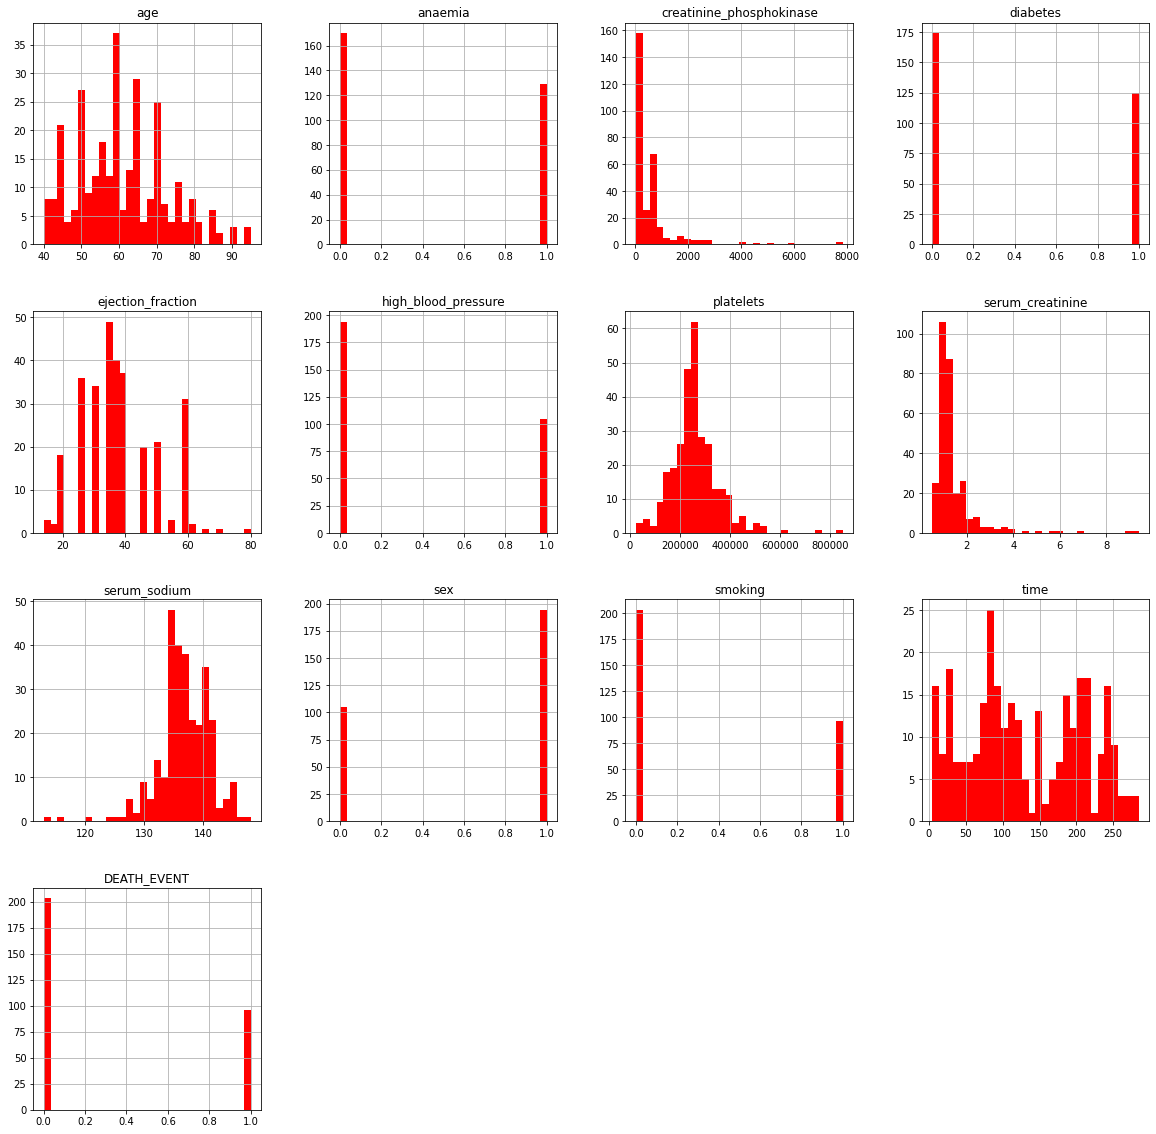

In [39]:
df.hist(bins = 30, figsize=(20,20), color = 'r')

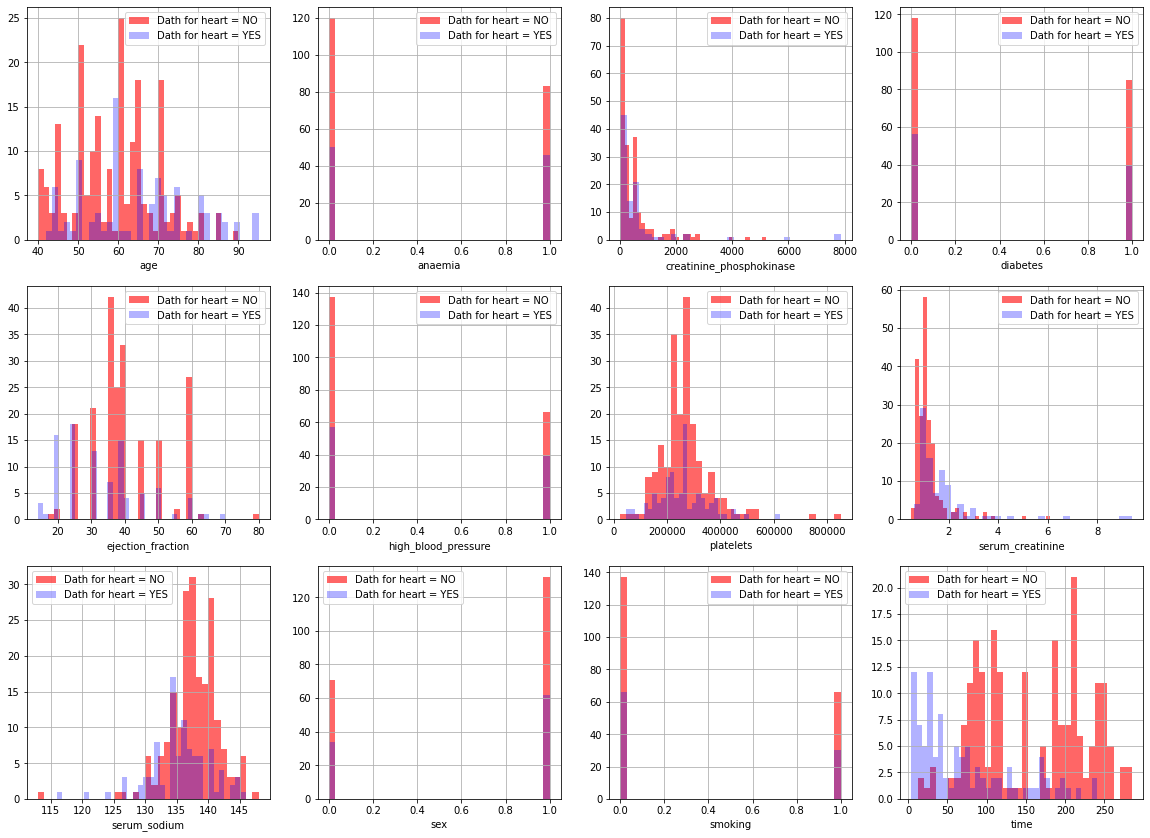

In [40]:
plt.figure(figsize=(20, 30))
for i, column in enumerate(df.drop('DEATH_EVENT', axis=1).columns, 1):  # enumera todas las columnas menos la de 'DEATH_EVENT' 
    plt.subplot(6, 4, i)
    df[df["DEATH_EVENT"] == 0][column].hist(bins=35, color='red', label='Dath for heart = NO', alpha=0.6)
    df[df["DEATH_EVENT"] == 1][column].hist(bins=35, color='blue', label='Dath for heart = YES', alpha=0.3)
    plt.legend()
    plt.xlabel(column)

In [41]:
import math
val_counts = df["DEATH_EVENT"].value_counts()
no_DEATH_EVENT = (val_counts[0] / df.shape[0])*100
DEATH_EVENT = (val_counts[1] / df.shape[0]) * 100

print(f"No DEATH EVENT: {math.floor(no_DEATH_EVENT)}%")
print(f"DEATH EVENT: {math.ceil(DEATH_EVENT)}%")

No DEATH EVENT: 67%
DEATH EVENT: 33%


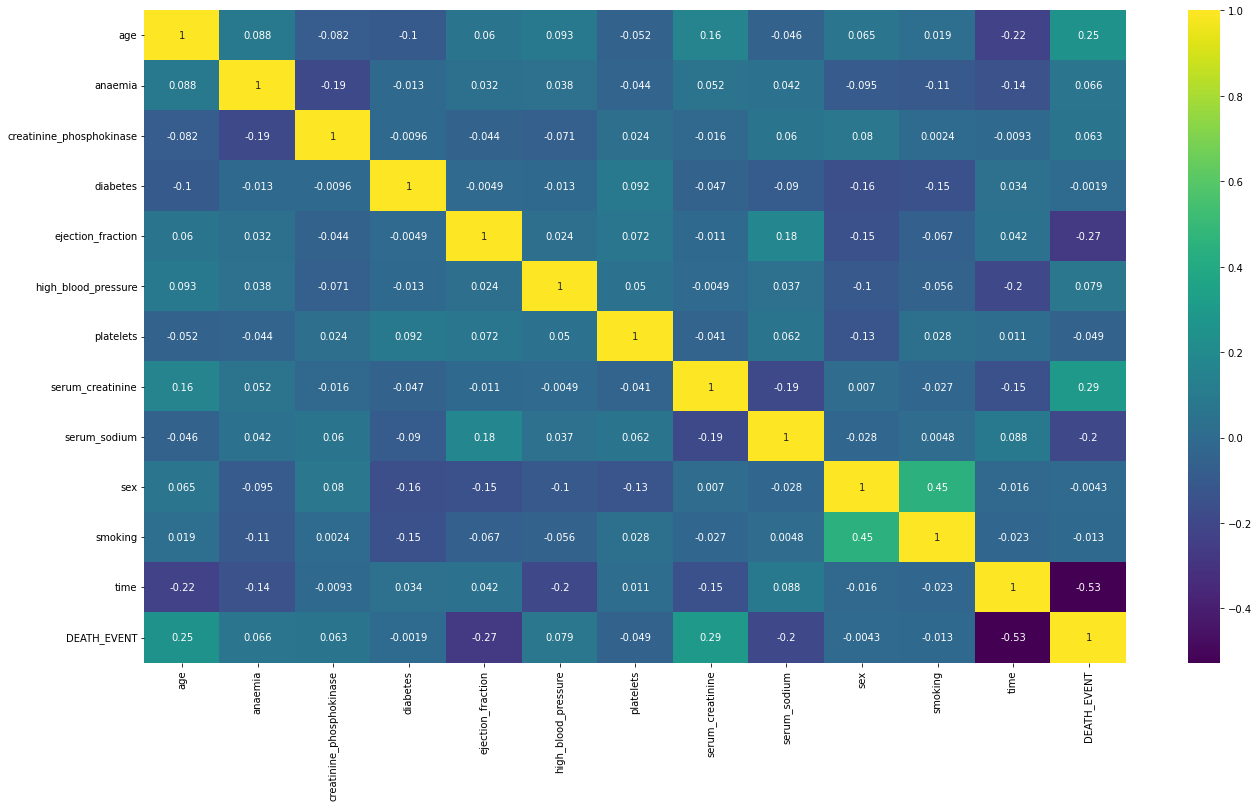

In [42]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(), annot =True, cmap='viridis')

In [43]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [47]:
X_df = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

In [48]:
X_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


# ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO LA REGRESIÓN LOGÍSTICA

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_df)

In [50]:
X

array([[0.63636364, 0.        , 0.07131921, ..., 1.        , 0.        ,
        0.        ],
       [0.27272727, 0.        , 1.        , ..., 1.        , 0.        ,
        0.00711744],
       [0.45454545, 0.        , 0.01569278, ..., 1.        , 1.        ,
        0.01067616],
       ...,
       [0.09090909, 0.        , 0.25988773, ..., 0.        , 0.        ,
        0.97508897],
       [0.09090909, 0.        , 0.30492473, ..., 1.        , 1.        ,
        0.98220641],
       [0.18181818, 0.        , 0.02207196, ..., 1.        , 1.        ,
        1.        ]])

In [51]:
y = df['DEATH_EVENT']

In [52]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [54]:
X_train.shape

(224, 12)

In [55]:
X_test.shape

(75, 12)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [57]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0])

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 84.0 %


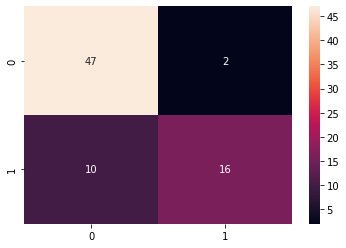

In [59]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89        49
           1       0.89      0.62      0.73        26

    accuracy                           0.84        75
   macro avg       0.86      0.79      0.81        75
weighted avg       0.85      0.84      0.83        75



# ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

In [94]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
y_pred = model.predict(X_test)

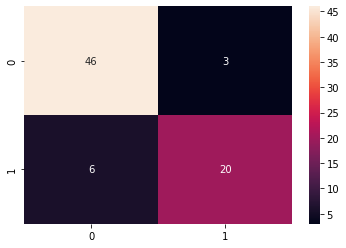

In [96]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [97]:
print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 88.0 %


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.87      0.77      0.82        26

    accuracy                           0.88        75
   macro avg       0.88      0.85      0.86        75
weighted avg       0.88      0.88      0.88        75



# ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO DEEP LEARNING

In [65]:
import tensorflow as tf

In [67]:
len(df.columns)

13

In [80]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(12, ))) # 12 son las variables del dataset del principio
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [81]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [84]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size=50)

Epoch 1/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0262 - accuracy: 0.9911
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0121 - accuracy: 0.9955
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 11/100
5/5 [===========

In [85]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 0s 7ms/step


array([[1.58625160e-04],
       [1.03455514e-01],
       [2.27458568e-12],
       [1.51748793e-07],
       [9.82769251e-01],
       [5.61259661e-08],
       [5.24845891e-05],
       [7.66027460e-06],
       [9.99998927e-01],
       [6.88141721e-09],
       [8.81769171e-04],
       [6.92465249e-03],
       [4.88736550e-04],
       [6.69251263e-01],
       [1.75868664e-02],
       [5.19982066e-08],
       [4.06320260e-06],
       [2.28061061e-02],
       [1.13162923e-09],
       [2.04674588e-08],
       [1.00000000e+00],
       [9.99999940e-01],
       [9.97566283e-01],
       [9.10998464e-01],
       [3.52139324e-07],
       [5.83027780e-01],
       [1.32463839e-07],
       [1.66387457e-04],
       [1.97327424e-07],
       [6.72082832e-13],
       [9.99946952e-01],
       [9.97137845e-01],
       [9.99999046e-01],
       [9.99999940e-01],
       [2.77808576e-09],
       [7.75705473e-08],
       [9.99244511e-01],
       [1.76395676e-09],
       [9.90978599e-01],
       [1.46352202e-02],


In [86]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [87]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

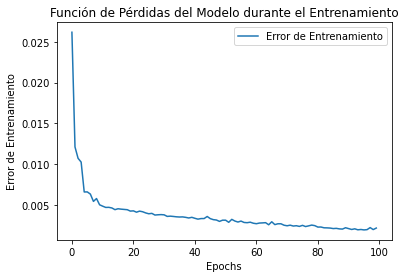

In [88]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

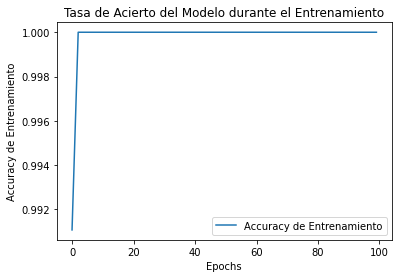

In [89]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

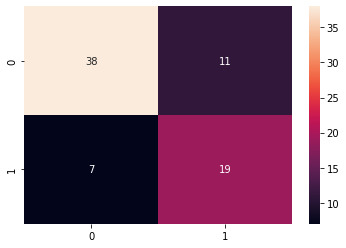

In [90]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.63      0.73      0.68        26

    accuracy                           0.76        75
   macro avg       0.74      0.75      0.74        75
weighted avg       0.77      0.76      0.76        75



In [92]:
print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 76.0 %
